In [5]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [13]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
X = df.iloc[:, [3, 4]].values

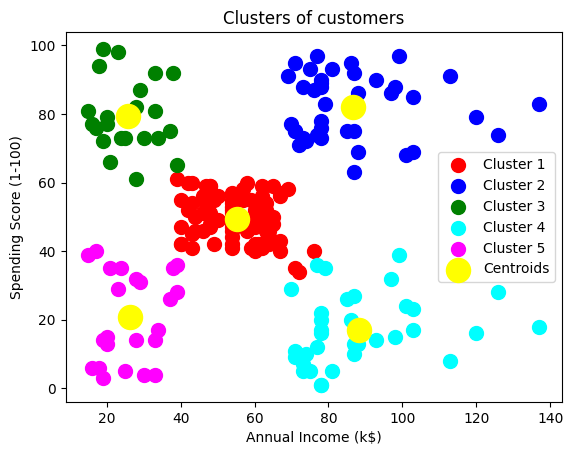

In [ ]:
#Using kmeans clustering
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

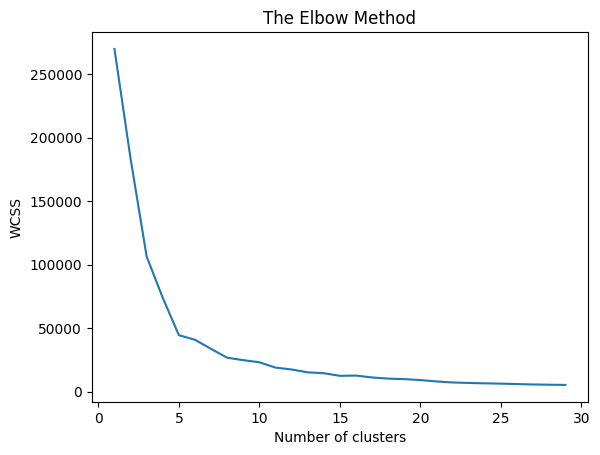

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

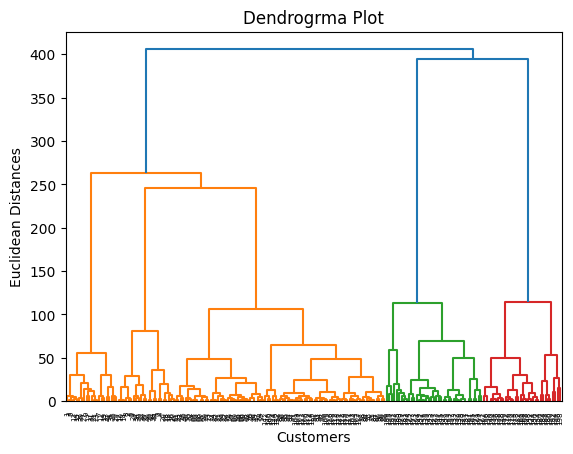

In [ ]:
#Using Hierarchical Clustering
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(X, method="ward"))
plt.title("Dendrogrma Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Customers")
plt.show()

In [ ]:
#Using Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

In [28]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
X = df.iloc[:, [3, 4]].values

In [31]:
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_agglo = agglo.fit_predict(X)

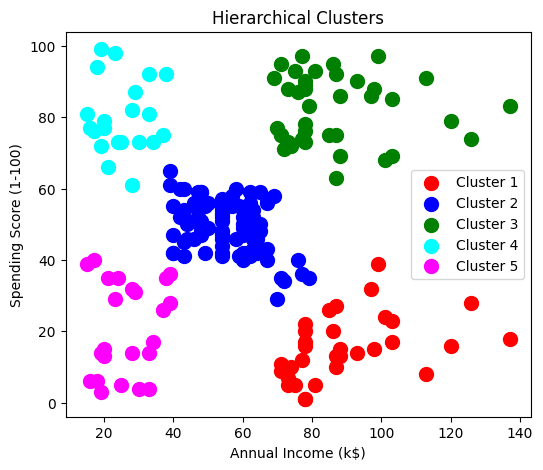

In [32]:
plt.figure(figsize=(6, 5))
plt.scatter(X[y_agglo == 0, 0], X[y_agglo == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_agglo == 1, 0], X[y_agglo == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_agglo == 2, 0], X[y_agglo == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_agglo == 3, 0], X[y_agglo == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_agglo == 4, 0], X[y_agglo == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Hierarchical Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [35]:
# Comparison using Silhouette Score
from sklearn.metrics import silhouette_score

kmeans_labels = y_kmeans
print("KMeans")
print("Silhouette Score:", silhouette_score(X, kmeans_labels))

agglo_labels = y_agglo
print("\n🔍 Agglomerative")
print("Silhouette Score:", silhouette_score(X, agglo_labels))

KMeans
Silhouette Score: 0.553931997444648

🔍 Agglomerative
Silhouette Score: 0.5529945955148897
